#PROJECT2_NETFLIX.CSVFILE

In [9]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

data = pd.read_csv("//content/sample_data/netflix.csv.zip")
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [10]:
#shape
data.shape

(8807, 12)

In [11]:
#finding null values
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [12]:
#assign values to null values
data.fillna(method = "bfill",inplace = True)
data.isnull().sum()

<ipython-input-12-a26a44e6014c>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method = "bfill",inplace = True)


,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [13]:
#shape of dataset after adding values
data.shape

(8807, 12)

#1)Find out which types of genre has most movies and TV Shows

In [14]:
#1)Find out which types of genre has most movies and TV Shows
df1 = data[["type","listed_in"]].value_counts().reset_index(name = "counts")
df2 = df1.head(10)
df2

,type,listed_in,counts
0,Movie,"Dramas, International Movies",362
1,Movie,Documentaries,359
2,Movie,Stand-Up Comedy,334
3,Movie,"Comedies, Dramas, International Movies",274
4,Movie,"Dramas, Independent Movies, International Movies",252
5,TV Show,Kids' TV,220
6,Movie,Children & Family Movies,215
7,Movie,"Children & Family Movies, Comedies",201
8,Movie,"Documentaries, International Movies",186
9,Movie,"Dramas, International Movies, Romantic Movies",180


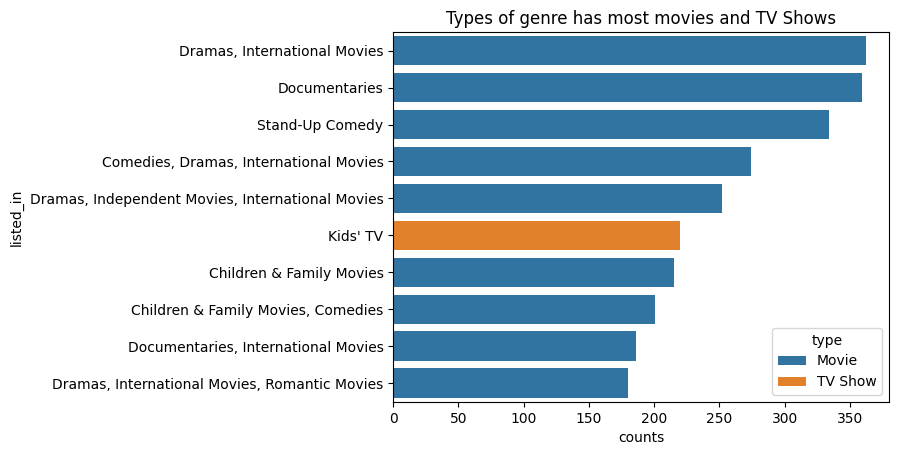

In [15]:
sn.barplot(data = df2,x= "counts", y="listed_in",hue = "type")
plt.title("Types of genre has most movies and TV Shows")
plt.show()

# 2) What is the distribution of content types (e.g., Movies vs. TV Shows) in the dataset?

In [16]:
# 2) What is the distribution of content types (e.g., Movies vs. TV Shows) in the dataset?

df1 = data["type"].value_counts().reset_index(name = "counts")
df1

,type,counts
0,Movie,6131
1,TV Show,2676


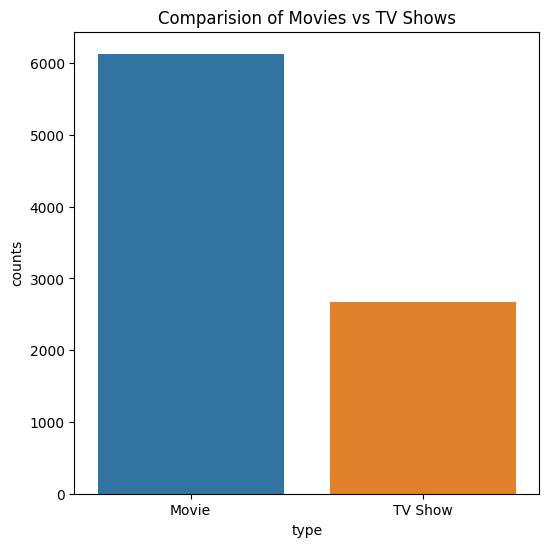

In [17]:
plt.figure(figsize=(6,6))
sn.barplot(data=df1,x = "type",y = "counts",hue = "type")
plt.title("Comparision of Movies vs TV Shows")
plt.show()

# 3) Which countries contribute the most to the content library?

In [18]:
# 3) Which countries contribute the most to the content library?

dt1 = data["country"].value_counts().reset_index(name = "counts")
dt2 = dt1.head(10)
dt2

,country,counts
0,United States,3100
1,India,1044
2,United Kingdom,454
3,Japan,266
4,South Korea,228
5,Canada,196
6,Spain,168
7,France,139
8,Mexico,119
9,Nigeria,118


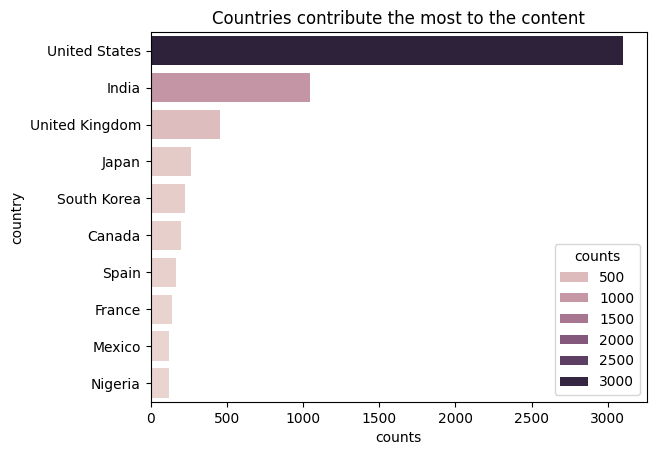

In [19]:
sn.barplot(data = dt2,x = "counts",y = "country",hue = "counts")
plt.title("Countries contribute the most to the content")
plt.show()

#4)What are the most common ratings, and how are they distributed across different types of content?

In [20]:
#4)What are the most common ratings, and how are they distributed across different types of content?

df1 = data["rating"].value_counts().reset_index(name = "counts")
df2 = df1
df2

,rating,counts
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,865
3,R,800
4,PG-13,490
5,TV-Y7,335
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


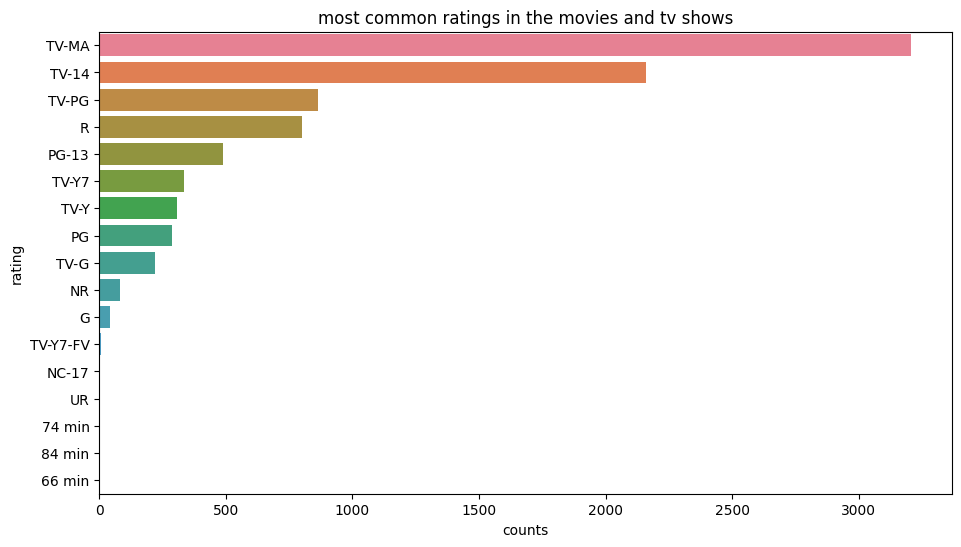

In [21]:
plt.figure(figsize=(11,6))
sn.barplot(data = df2 ,x = "counts",y = "rating",hue = "rating")
plt.title("most common ratings in the movies and tv shows")
plt.show()